In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
vix_Data = pd.read_csv("resources/vix_data_updated.csv", index_col="dates").drop("target", axis = 1)["VIX"]

In [214]:
vix_Data = pd.DataFrame(vix_Data)

### Train test-> we need to decide what percentage at the end of the data we will be using .
- 20%

In [215]:
vix = vix_Data["VIX"]

In [216]:
vix = pd.DataFrame(vix)

In [217]:
vix = vix.loc["2017-1-1":]

In [218]:
vix

,VIX
dates,
2017-10-02,9.45
2017-10-03,9.51
2017-10-04,9.63
2017-10-05,9.19
2017-10-06,9.65
...,...
2019-09-10,15.20
2019-09-11,14.61
2019-09-12,14.22


In [219]:
test_percent = 0.3

## we now need to calculate the cutoff point - index a 649 will be where our data will be cutoff for testing

In [220]:
test_point = np.round(len(vix) * test_percent)
test_point

148.0

### Set the index for the testing data

In [221]:
test_index = int(len(vix) - test_point)

In [222]:
test_index

344

### Setting training and test data

In [223]:
train = vix.iloc[:test_index]

In [224]:
test = vix.iloc[test_index:]

### Scaling our data

In [225]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
scalar  = MinMaxScaler()

In [227]:
train_scaled = scalar.fit_transform(train)

In [228]:
test_scaled = scalar.transform(test)

In [231]:
len(train_scaled)

344

### Lets make batches of data that the RNN will understand

In [230]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

### length shouldn not be an arbritraty number -> we should make sure its an good enough cycle for our model Such as a quater or 6 months etc. 

In [232]:
length = 100
batch = 1
generator = TimeseriesGenerator(train_scaled,train_scaled, length= length, batch_size=batch)

In [233]:
len(train_scaled)

344

In [234]:
len(generator)

244

In [235]:
X, y = generator[0]

In [236]:
X

array([[[1.10007097e-02],
        [1.31298793e-02],
        [1.73882186e-02],
        [1.77430802e-03],
        [1.80979418e-02],
        [4.22285309e-02],
        [3.33569908e-02],
        [2.51951739e-02],
        [2.73243435e-02],
        [1.66784954e-02],
        [2.73243435e-02],
        [4.15188077e-02],
        [3.30021292e-02],
        [3.22924060e-02],
        [2.94535131e-02],
        [6.84882896e-02],
        [7.16820440e-02],
        [7.41660752e-02],
        [7.66501065e-02],
        [2.34208659e-02],
        [4.82611781e-02],
        [3.69056068e-02],
        [3.76153300e-02],
        [2.80340667e-02],
        [0.00000000e+00],
        [9.22640170e-03],
        [2.66146203e-02],
        [2.27111427e-02],
        [4.82611781e-02],
        [7.62952449e-02],
        [8.37473385e-02],
        [8.69410930e-02],
        [1.41589780e-01],
        [9.29737402e-02],
        [8.12633073e-02],
        [5.35841022e-02],
        [2.09368346e-02],
        [2.62597587e-02],
        [1.8

In [237]:
y

array([[0.23633783]])

### lets create our model

In [238]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM

### we need to determine how many features we are actually training off...

In [239]:
n_features = 1

In [240]:
model = Sequential()
model.add(SimpleRNN(100, input_shape = (length, n_features)))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

### Fit model

In [241]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [242]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
244/244 [==============================] - 241s 986ms/step - loss: 0.0143
Epoch 2/5
244/244 [==============================] - 241s 987ms/step - loss: 0.0050
Epoch 3/5
244/244 [==============================] - 241s 987ms/step - loss: 0.0048
Epoch 4/5
244/244 [==============================] - 241s 987ms/step - loss: 0.0036
Epoch 5/5
244/244 [==============================] - 241s 986ms/step - loss: 0.0036


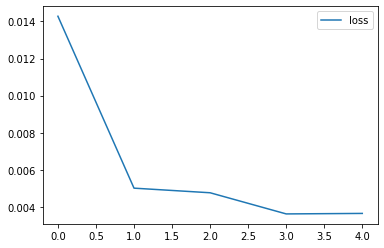

In [243]:
pd.DataFrame(model.history.history).plot()

In [244]:
first_eval_batch = train_scaled[-length:]

In [245]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [246]:
first_eval_batch

array([[[0.09439319],
        [0.09013485],
        [0.10858765],
        [0.11639461],
        [0.1330731 ],
        [0.11603974],
        [0.10574876],
        [0.10149042],
        [0.10326473],
        [0.08765082],
        [0.18026969],
        [0.20156139],
        [0.23243435],
        [0.24166075],
        [0.49041874],
        [0.56210078],
        [0.43186657],
        [0.43151171],
        [0.30092264],
        [0.29311568],
        [0.38750887],
        [0.38147622],
        [0.37260468],
        [0.41057488],
        [0.57097232],
        [0.5351313 ],
        [0.53300213],
        [0.55216466],
        [0.50425834],
        [0.42902768],
        [0.36195884],
        [0.36799148],
        [0.38396026],
        [0.38218595],
        [0.25621008],
        [0.2689851 ],
        [0.29169624],
        [0.40134847],
        [0.38608943],
        [0.4297374 ],
        [0.38466998],
        [0.31937544],
        [0.38892832],
        [0.47338538],
        [0.41376863],
        [0

In [247]:
model.predict(first_eval_batch)

array([[0.29340708]], dtype=float32)

In [248]:
test_scaled[0]

array([0.25124202])

In [249]:
my_predictions = []
first_ev = train_scaled[-length:]
current_batch = first_ev.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    my_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [250]:
my_predictions

[array([0.29340708], dtype=float32),
 array([0.31560504], dtype=float32),
 array([0.34206954], dtype=float32),
 array([0.39354822], dtype=float32),
 array([0.45186636], dtype=float32),
 array([0.51500803], dtype=float32),
 array([0.5761533], dtype=float32),
 array([0.64717287], dtype=float32),
 array([0.7238304], dtype=float32),
 array([0.82183594], dtype=float32),
 array([0.9236453], dtype=float32),
 array([1.0339772], dtype=float32),
 array([1.1586068], dtype=float32),
 array([1.2790314], dtype=float32),
 array([1.4080672], dtype=float32),
 array([1.5309227], dtype=float32),
 array([1.6590798], dtype=float32),
 array([1.7736034], dtype=float32),
 array([1.880602], dtype=float32),
 array([1.9747454], dtype=float32),
 array([2.05205], dtype=float32),
 array([2.122984], dtype=float32),
 array([2.178432], dtype=float32),
 array([2.2260783], dtype=float32),
 array([2.2618358], dtype=float32),
 array([2.2893648], dtype=float32),
 array([2.3136191], dtype=float32),
 array([2.3303504], dtype

In [251]:
test_scaled

array([[0.25124202],
       [0.20475515],
       [0.20369056],
       [0.17317246],
       [0.18878637],
       [0.15507452],
       [0.20262598],
       [0.21398155],
       [0.19730305],
       [0.20014194],
       [0.15720369],
       [0.19481902],
       [0.1987225 ],
       [0.23420866],
       [0.26437189],
       [0.24520937],
       [0.18417317],
       [0.16430092],
       [0.1515259 ],
       [0.15471966],
       [0.13271824],
       [0.1405252 ],
       [0.15684883],
       [0.16926899],
       [0.15933286],
       [0.26046842],
       [0.25514549],
       [0.19659333],
       [0.21327182],
       [0.18772179],
       [0.16217175],
       [0.15117104],
       [0.1497516 ],
       [0.16323634],
       [0.15755855],
       [0.13058907],
       [0.14336409],
       [0.18239886],
       [0.14762243],
       [0.1376863 ],
       [0.10184528],
       [0.11284599],
       [0.10787793],
       [0.12278211],
       [0.10468417],
       [0.11639461],
       [0.11142654],
       [0.141

In [252]:
true_prediciton = scalar.inverse_transform(my_predictions)

In [253]:
true_prediciton

array([[17.40821159],
       [18.03375015],
       [18.77951954],
       [20.23018885],
       [21.87359398],
       [23.65292635],
       [25.37599938],
       [27.37733143],
       [29.53754073],
       [32.29933665],
       [35.16832505],
       [38.27747611],
       [41.78953871],
       [45.18310474],
       [48.81933444],
       [52.28140031],
       [55.89286849],
       [59.12014492],
       [62.13536442],
       [64.78832517],
       [66.9667722 ],
       [68.96568722],
       [70.52821342],
       [71.8708857 ],
       [72.87853323],
       [73.65430048],
       [74.33778728],
       [74.80927424],
       [75.17574894],
       [75.45578167],
       [75.67460763],
       [75.84542222],
       [75.94812328],
       [76.05645456],
       [76.12478981],
       [76.16839375],
       [76.20836963],
       [76.2371993 ],
       [76.26089592],
       [76.27163902],
       [76.28414912],
       [76.29363584],
       [76.29919887],
       [76.30499033],
       [76.30828246],
       [76

In [254]:
test["predicitons"] = true_prediciton

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [256]:
test

,VIX,predicitons
dates,,
2019-02-14,16.22,17.408212
2019-02-15,14.91,18.033750
2019-02-19,14.88,18.779520
2019-02-20,14.02,20.230189
2019-02-21,14.46,21.873594
...,...,...
2019-09-10,15.20,76.326315
2019-09-11,14.61,76.326315
2019-09-12,14.22,76.326322


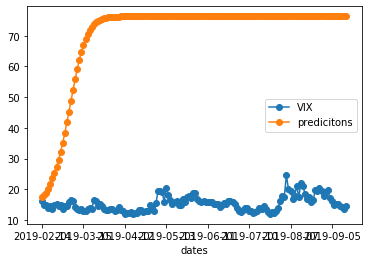

In [255]:
test.plot(marker ="o")

### Lets see if we cna improve on this with LSTM